<a href="https://colab.research.google.com/github/Lorybs/PES_ciencia_de_dados/blob/main/ProjetoPES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Instalando os primeiros principais pacotes

In [ ]:
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install kaggle
!pip install fancyimpute

In [ ]:
!pip install --upgrade ipykernel
!pip install ipython==7.10.0
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#importanto alguns pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


#2 Importanto os dados do Kaggle

In [ ]:
from google.colab import files
files.upload() #enviar o arquivo kaggle.json

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#importando base com índices de fertilidade
!kaggle datasets download -d omarsobhy14/fertility-rate-per-country

In [ ]:
#importando dados dos países com média de tempo de escolaridade
!kaggle datasets download -d fredericksalazar/average-years-of-schooling-since-1870-2017

In [ ]:
#importando base de renda percapta dos países
!kaggle datasets download -d zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths

In [ ]:
#importando base de país por região
!kaggle datasets download -d andradaolteanu/country-mapping-iso-continent-region

In [11]:
!unzip \*.zip  && rm *.zip

Archive:  world-gdpgdp-gdp-per-capita-and-annual-growths.zip
  inflating: gdp.csv                 
  inflating: gdp_growth.csv          
  inflating: gdp_per_capita.csv      
  inflating: gdp_per_capita_growth.csv  
  inflating: gdp_ppp.csv             
  inflating: gdp_ppp_per_capita.csv  

Archive:  average-years-of-schooling-since-1870-2017.zip
  inflating: mean-years-of-schooling-long-run.csv  

Archive:  fertility-rate-per-country.zip
  inflating: API_SP.DYN.TFRT.IN_DS2_en_csv_v2_5455118.csv  

Archive:  country-mapping-iso-continent-region.zip
  inflating: continents2.csv         

4 archives were successfully processed.


In [12]:
fertilidade = pd.read_csv("API_SP.DYN.TFRT.IN_DS2_en_csv_v2_5455118.csv")

In [13]:
escolaridade = pd.read_csv("mean-years-of-schooling-long-run.csv", sep=";")

In [14]:
percapta = pd.read_csv("gdp_per_capita.csv")

In [15]:
regiao = pd.read_csv("continents2.csv")

# 3 Inspecionando os dados


In [16]:
fertilidade.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,...,2.117000,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,NaN
1,Africa Eastern and Southern,AFE,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,6.810571,6.818612,...,4.808821,4.739863,4.677619,4.615671,4.570410,4.527707,4.482899,4.416902,4.354710,NaN
2,Afghanistan,AFG,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,7.320000,7.339000,...,5.696000,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,NaN
3,Africa Western and Central,AFW,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,6.564967,6.589806,...,5.506350,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,NaN
4,Angola,AGO,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,7.194000,7.267000,...,5.953000,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,NaN


In [17]:
escolaridade.head()

,Entity,Code,Year,avg_years_of_schooling
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01


In [18]:
percapta.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


In [19]:
regiao.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


#3 Análise Exporatória e pré processamento


In [20]:
fertilidade.shape

(266, 65)

In [21]:
fertilidade.isnull().sum()

Country Name      0
Country Code      0
1960             13
1961             14
1962             13
               ... 
2018              8
2019              8
2020              7
2021              8
2022            266
Length: 65, dtype: int64

In [22]:
#ajustando o nome da coluna de sigla do país na tabela fertilidade
fertilidade.rename(columns={'Country Code':'Code'},inplace=True)
fertilidade.rename(columns={'Country Name':'Country'},inplace=True)

In [23]:
#transformando o ano da tabela de fertilidade em variável, ajustando para o formato final do dataset
fertilidade = pd.melt(frame = fertilidade,id_vars=['Country','Code'], var_name = 'Year',value_name='indice_fertilidade')

In [24]:
fertilidade.head()

,Country,Code,Year,indice_fertilidade
0,Aruba,ABW,1960,4.820000
1,Africa Eastern and Southern,AFE,1960,6.724125
2,Afghanistan,AFG,1960,7.282000
3,Africa Western and Central,AFW,1960,6.458448
4,Angola,AGO,1960,6.708000


In [25]:
fertilidade.isnull().sum()

Country                 0
Code                    0
Year                    0
indice_fertilidade    879
dtype: int64

In [26]:
fertilidade['Year'] = fertilidade['Year'].astype('int')

In [27]:
fertilidade = fertilidade.drop(fertilidade[(fertilidade['Year'] < 1960) | (fertilidade['Year'] > 2020)].index)

In [28]:
fertilidade.isnull().sum()

Country                 0
Code                    0
Year                    0
indice_fertilidade    605
dtype: int64

In [29]:
#ordenando por código do país e ano
fertilidade = fertilidade.sort_values(['Code' , 'Year'], ascending=True , ignore_index=True)

In [30]:
fertilidade.head()

,Country,Code,Year,indice_fertilidade
0,Aruba,ABW,1960,4.820
1,Aruba,ABW,1961,4.655
2,Aruba,ABW,1962,4.471
3,Aruba,ABW,1963,4.271
4,Aruba,ABW,1964,4.059


In [31]:
#preenchendo os dados nulos de fertilidade com base nos valores anteriores e posteriores
fertilidade = fertilidade.fillna(axis=0, method='ffill', limit=3)
fertilidade = fertilidade.fillna(axis=0, method='bfill', limit=3)

In [32]:
fertilidade.isnull().sum()

Country                 0
Code                    0
Year                    0
indice_fertilidade    472
dtype: int64

In [33]:
fertilidade.head()

,Country,Code,Year,indice_fertilidade
0,Aruba,ABW,1960,4.820
1,Aruba,ABW,1961,4.655
2,Aruba,ABW,1962,4.471
3,Aruba,ABW,1963,4.271
4,Aruba,ABW,1964,4.059


In [34]:
import pandas as pd
from fancyimpute import KNN

In [35]:
#usando o knn para preencher o restante dos dados ausentes
def preencher_ausentes_knn(fertilidade, indice_fertilidade):
    coluna_array = fertilidade[indice_fertilidade].values
    knn_imputer = KNN(k=5)
    coluna_array_filled = knn_imputer.fit_transform(coluna_array.reshape(-1, 1))
    fertilidade[indice_fertilidade] = coluna_array_filled.flatten()

    return fertilidade

In [ ]:
fertilidade = preencher_ausentes_knn(fertilidade, 'indice_fertilidade')

In [37]:
display(fertilidade)

,Country,Code,Year,indice_fertilidade
0,Aruba,ABW,1960,4.820
1,Aruba,ABW,1961,4.655
2,Aruba,ABW,1962,4.471
3,Aruba,ABW,1963,4.271
4,Aruba,ABW,1964,4.059
...,...,...,...,...
16221,Zimbabwe,ZWE,2016,3.771
16222,Zimbabwe,ZWE,2017,3.706
16223,Zimbabwe,ZWE,2018,3.659
16224,Zimbabwe,ZWE,2019,3.599


In [38]:
fertilidade.isnull().sum()

Country               0
Code                  0
Year                  0
indice_fertilidade    0
dtype: int64

In [39]:
#criando uma variável chave primária do tipo string para fazer o merge com as outras bases
fertilidade['nova_chave'] = fertilidade['Code'].astype(str) + '_' + fertilidade['Year'].astype(str)

In [40]:
fertilidade = fertilidade[['nova_chave', 'Country', 'Code', 'Year', 'indice_fertilidade']]

In [41]:
fertilidade.head()

,nova_chave,Country,Code,Year,indice_fertilidade
0,ABW_1960,Aruba,ABW,1960,4.820
1,ABW_1961,Aruba,ABW,1961,4.655
2,ABW_1962,Aruba,ABW,1962,4.471
3,ABW_1963,Aruba,ABW,1963,4.271
4,ABW_1964,Aruba,ABW,1964,4.059


In [42]:
#criando uma variável chave primária do tipo string para fazer o merge com as outras bases
escolaridade['nova_chave'] = escolaridade['Code'].astype(str) + '_' + escolaridade['Year'].astype(str)

In [43]:
#simplificando nome da coluna escolaridade
escolaridade.rename(columns={'avg_years_of_schooling':'Avg_Years_at_Shool'},inplace=True)
escolaridade.rename(columns={'Entity':'Country'},inplace=True)

In [44]:
escolaridade.columns.values

array(['Country', 'Code', 'Year', 'Avg_Years_at_Shool', 'nova_chave'],
      dtype=object)

In [45]:
escolaridade = escolaridade[['nova_chave', 'Country', 'Code', 'Year', 'Avg_Years_at_Shool']]

In [46]:
escolaridade.sort_values(by='Avg_Years_at_Shool', ascending=True)

,nova_chave,Country,Code,Year,Avg_Years_at_Shool
7628,YEM_1975,Yemen,YEM,1975,0.00
6886,THA_1870,Thailand,THA,1870,0.00
7617,YEM_1920,Yemen,YEM,1920,0.01
7618,YEM_1925,Yemen,YEM,1925,0.01
7619,YEM_1930,Yemen,YEM,1930,0.01
...,...,...,...,...,...
2606,DEU_2014,Germany,DEU,2014,14.00
2605,DEU_2013,Germany,DEU,2013,14.00
2609,DEU_2017,Germany,DEU,2017,14.10
2607,DEU_2015,Germany,DEU,2015,14.10


In [47]:
escolaridade.isnull().sum()

nova_chave            0
Country               0
Code                  0
Year                  0
Avg_Years_at_Shool    0
dtype: int64

In [48]:
#ajustando nome da coluna da sigla do país
regiao.rename(columns={'alpha-3':'Code'},inplace=True)

In [49]:
regiao.head()

,name,alpha-2,Code,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [50]:
#selecionando apenas colunas necesssarias para o novo dataset
regiao.columns.values

array(['name', 'alpha-2', 'Code', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code',
       'sub-region-code', 'intermediate-region-code'], dtype=object)

In [51]:
regiaoselecionadas = ['Code' , 'region']

In [52]:
regiao2 = regiao.filter(items=regiaoselecionadas)

In [53]:
regiao2.head()

,Code,region
0,AFG,Asia
1,ALA,Europe
2,ALB,Europe
3,DZA,Africa
4,ASM,Oceania


In [54]:
regiao2.shape

(249, 2)

In [55]:
regiao2.isnull().sum()

Code      0
region    1
dtype: int64

In [56]:
#limpando dados vazios da regiao
regiao2.dropna(inplace= True)

In [57]:
regiao2.isnull().sum()

Code      0
region    0
dtype: int64

In [58]:
percapta.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


In [59]:
#transformando o ano em variável na tabela de renda percapta, ajustando para o formato final do dataset
percapta.rename(columns={'Country Name':'Country'},inplace=True)
percapta = pd.melt(frame = percapta,id_vars=['Country','Code'], var_name = 'Year',value_name='renda_percapta')

In [60]:
percapta.head()

,Country,Code,Year,renda_percapta
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,147.612227
2,Afghanistan,AFG,1960,59.773234
3,Africa Western and Central,AFW,1960,107.932233
4,Angola,AGO,1960,NaN


In [61]:
percapta['Year'].replace("Unnamed: 65",np.nan,inplace=True)

In [62]:
percapta.shape

(16492, 4)

In [63]:
percapta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         16492 non-null  object 
 1   Code            16492 non-null  object 
 2   Year            16226 non-null  object 
 3   renda_percapta  12837 non-null  float64
dtypes: float64(1), object(3)
memory usage: 515.5+ KB


In [64]:
percapta.isnull().sum()

Country              0
Code                 0
Year               266
renda_percapta    3655
dtype: int64

In [65]:
#eliminando dados sem renda percapta
percapta.dropna(inplace= True)

In [66]:
percapta.isnull().sum()

Country           0
Code              0
Year              0
renda_percapta    0
dtype: int64

In [67]:
percapta.shape

(12837, 4)

In [68]:
#criando uma variável chave primária do tipo string para fazer o merge com as outras bases
percapta['nova_chave'] = percapta['Code'].astype(str) + '_' + percapta['Year'].astype(str)

In [69]:
percapta = percapta[['nova_chave', 'Country', 'Code', 'Year', 'renda_percapta']]

In [70]:
percapta.head()

,nova_chave,Country,Code,Year,renda_percapta
1,AFE_1960,Africa Eastern and Southern,AFE,1960,147.612227
2,AFG_1960,Afghanistan,AFG,1960,59.773234
3,AFW_1960,Africa Western and Central,AFW,1960,107.932233
13,AUS_1960,Australia,AUS,1960,1810.619230
14,AUT_1960,Austria,AUT,1960,935.460427


In [71]:
#selecionando apenas colunas necesssarias para o novodataset
percapta.columns.values

array(['nova_chave', 'Country', 'Code', 'Year', 'renda_percapta'],
      dtype=object)

In [72]:
percaptaselecionadas = ['nova_chave' , 'renda_percapta']

In [73]:
percapta2 = percapta.filter(items=percaptaselecionadas)

In [74]:
percapta2.sort_values(by='renda_percapta', ascending=True)

,nova_chave,renda_percapta
1756,MMR_1966,12.802812
2022,MMR_1967,12.915456
1490,MMR_1965,16.596459
1224,MMR_1964,20.035487
3086,MMR_1971,20.039529
...,...,...
15565,LIE_2018,180366.715198
12917,MCO_2008,185785.725925
15577,MCO_2018,185978.609251
14513,MCO_2014,189432.370013


In [75]:
#montando um novo dataset com apenas os dados necessários para análise, comecando com fertilidade e escolaridade
novodataset1 = pd.merge(fertilidade, escolaridade, left_on = ['nova_chave', 'Country', 'Code', 'Year'], how='inner',
                        right_on=['nova_chave' , 'Country' , 'Code' , 'Year'] , validate = 'm:m')

In [76]:
display(novodataset1)

,nova_chave,Country,Code,Year,indice_fertilidade,Avg_Years_at_Shool
0,AFG_1960,Afghanistan,AFG,1960,7.282,0.22
1,AFG_1965,Afghanistan,AFG,1965,7.305,0.29
2,AFG_1970,Afghanistan,AFG,1970,7.400,0.35
3,AFG_1975,Afghanistan,AFG,1975,7.542,0.62
4,AFG_1980,Afghanistan,AFG,1980,7.588,0.78
...,...,...,...,...,...,...
4990,ZWE_2013,Zimbabwe,ZWE,2013,4.064,8.00
4991,ZWE_2014,Zimbabwe,ZWE,2014,3.962,8.20
4992,ZWE_2015,Zimbabwe,ZWE,2015,3.849,8.20
4993,ZWE_2016,Zimbabwe,ZWE,2016,3.771,8.20


In [77]:
#agregando a coluna de renda percapata
novodataset2 = pd.merge(novodataset1,percapta2, how='left', left_on=['nova_chave'], right_on=['nova_chave'])

In [78]:
display(novodataset2)

,nova_chave,Country,Code,Year,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
0,AFG_1960,Afghanistan,AFG,1960,7.282,0.22,59.773234
1,AFG_1965,Afghanistan,AFG,1965,7.305,0.29,101.108325
2,AFG_1970,Afghanistan,AFG,1970,7.400,0.35,156.518771
3,AFG_1975,Afghanistan,AFG,1975,7.542,0.62,186.510838
4,AFG_1980,Afghanistan,AFG,1980,7.588,0.78,272.655510
...,...,...,...,...,...,...,...
4990,ZWE_2013,Zimbabwe,ZWE,2013,4.064,8.00,1429.998461
4991,ZWE_2014,Zimbabwe,ZWE,2014,3.962,8.20,1434.896277
4992,ZWE_2015,Zimbabwe,ZWE,2015,3.849,8.20,1445.069702
4993,ZWE_2016,Zimbabwe,ZWE,2016,3.771,8.20,1464.588957


In [79]:
#incluindo a regiao de outro dataset
novodataset3 = pd.merge(novodataset2,regiao2, how='left', left_on=['Code'], right_on=['Code'])
display(novodataset3)

,nova_chave,Country,Code,Year,indice_fertilidade,Avg_Years_at_Shool,renda_percapta,region
0,AFG_1960,Afghanistan,AFG,1960,7.282,0.22,59.773234,Asia
1,AFG_1965,Afghanistan,AFG,1965,7.305,0.29,101.108325,Asia
2,AFG_1970,Afghanistan,AFG,1970,7.400,0.35,156.518771,Asia
3,AFG_1975,Afghanistan,AFG,1975,7.542,0.62,186.510838,Asia
4,AFG_1980,Afghanistan,AFG,1980,7.588,0.78,272.655510,Asia
...,...,...,...,...,...,...,...,...
4990,ZWE_2013,Zimbabwe,ZWE,2013,4.064,8.00,1429.998461,Africa
4991,ZWE_2014,Zimbabwe,ZWE,2014,3.962,8.20,1434.896277,Africa
4992,ZWE_2015,Zimbabwe,ZWE,2015,3.849,8.20,1445.069702,Africa
4993,ZWE_2016,Zimbabwe,ZWE,2016,3.771,8.20,1464.588957,Africa


In [80]:
novodataset3.columns.values

array(['nova_chave', 'Country', 'Code', 'Year', 'indice_fertilidade',
       'Avg_Years_at_Shool', 'renda_percapta', 'region'], dtype=object)

In [81]:
#montando um dataset final com as colunas o ordem desejada
selecionadas = ['nova_chave', 'Country', 'Code', 'Year', 'region', 'indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta']

In [82]:
datasetfinal = novodataset3.filter(items=selecionadas)

In [83]:
datasetfinal.head()

,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
0,AFG_1960,Afghanistan,AFG,1960,Asia,7.282,0.22,59.773234
1,AFG_1965,Afghanistan,AFG,1965,Asia,7.305,0.29,101.108325
2,AFG_1970,Afghanistan,AFG,1970,Asia,7.400,0.35,156.518771
3,AFG_1975,Afghanistan,AFG,1975,Asia,7.542,0.62,186.510838
4,AFG_1980,Afghanistan,AFG,1980,Asia,7.588,0.78,272.655510


In [84]:
print(datasetfinal.isnull().sum())
#ainda necessário eliminar ajustar alguns dados nulos

nova_chave              0
Country                 0
Code                    0
Year                    0
region                  0
indice_fertilidade      0
Avg_Years_at_Shool      0
renda_percapta        298
dtype: int64


In [85]:
#ajustando o tipo dos variáveis
datasetfinal['Country'] = datasetfinal['Country'].astype('category')
datasetfinal['Code'] = datasetfinal['Code'].astype('category')
datasetfinal['region'] = datasetfinal['region'].astype('category')
datasetfinal['nova_chave'] = datasetfinal['nova_chave'].astype('category')
datasetfinal['Year'] = datasetfinal['Year'].astype('int')

In [86]:
datasetfinal.dtypes

nova_chave            category
Country               category
Code                  category
Year                     int64
region                category
indice_fertilidade     float64
Avg_Years_at_Shool     float64
renda_percapta         float64
dtype: object

In [87]:
print(datasetfinal['renda_percapta'].mean())
print(datasetfinal['renda_percapta'].median())
print(datasetfinal['renda_percapta'].max())
print(datasetfinal['renda_percapta'].min())

10015.183989423727
2830.27807089131
178864.851913785
16.5964592653032


In [88]:
datasetfinal['renda_percapta'].fillna(datasetfinal['renda_percapta'].mean(), inplace=True)

In [89]:
print(datasetfinal.isnull().sum())

nova_chave            0
Country               0
Code                  0
Year                  0
region                0
indice_fertilidade    0
Avg_Years_at_Shool    0
renda_percapta        0
dtype: int64


#4 Normalização e discretização

In [90]:
#análises descritivas antes da normalização
datasetfinal.describe()

,Year,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
count,4995.000000,4995.000000,4995.000000,4995.000000
mean,1999.367768,3.360134,6.991389,10015.183989
std,13.964580,1.812801,3.342408,16825.478541
min,1960.000000,0.000000,0.080000,16.596459
25%,1993.000000,1.820250,4.200000,852.470991
50%,2002.000000,2.744000,7.200000,3293.229979
75%,2010.000000,4.782500,9.800000,10015.183989
max,2017.000000,8.231000,14.100000,178864.851914


In [91]:
datasetfinal.columns.values

array(['nova_chave', 'Country', 'Code', 'Year', 'region',
       'indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta'],
      dtype=object)

In [92]:
#criando um novo dataset para preservar os dados antigos e comecar novas análises
selecionadas2 = ['Country', 'Code', 'Year', 'region',
       'indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta']

In [106]:
datasetcode = datasetfinal.filter(items=selecionadas2)
datasetcode.head()

,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
0,Afghanistan,AFG,1960,Asia,7.282,0.22,59.773234
1,Afghanistan,AFG,1965,Asia,7.305,0.29,101.108325
2,Afghanistan,AFG,1970,Asia,7.400,0.35,156.518771
3,Afghanistan,AFG,1975,Asia,7.542,0.62,186.510838
4,Afghanistan,AFG,1980,Asia,7.588,0.78,272.655510


In [107]:
datasetcode['Country'] = datasetfinal['Country'].astype('category')
datasetcode['Code'] = datasetfinal['Code'].astype('category')
datasetcode['region'] = datasetfinal['region'].astype('category')

datasetcode['Country'] = datasetfinal['Country'].cat.codes
datasetcode['Code'] = datasetfinal['Code'].cat.codes
datasetcode['region'] = datasetfinal['region'].cat.codes

In [108]:
datasetcode.dtypes

Country                 int16
Code                    int16
Year                    int64
region                   int8
indice_fertilidade    float64
Avg_Years_at_Shool    float64
renda_percapta        float64
dtype: object

In [112]:
datasetcode.head()

,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
0,0,0,1960,2,7.282,0.22,59.773234
1,0,0,1965,2,7.305,0.29,101.108325
2,0,0,1970,2,7.400,0.35,156.518771
3,0,0,1975,2,7.542,0.62,186.510838
4,0,0,1980,2,7.588,0.78,272.655510


In [115]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [117]:
dataset_norm=datasetcode

In [118]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [119]:
dataset_norm = scaler.fit_transform(datasetcode)

print(dataset_norm)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.84704167e-01
  9.98573466e-03 2.41415687e-04]
 [0.00000000e+00 0.00000000e+00 8.77192982e-02 ... 8.87498481e-01
  1.49786020e-02 4.72533913e-04]
 [0.00000000e+00 0.00000000e+00 1.75438596e-01 ... 8.99040214e-01
  1.92582026e-02 7.82352122e-04]
 ...
 [1.00000000e+00 1.00000000e+00 9.64912281e-01 ... 4.67622403e-01
  5.79172611e-01 7.98706836e-03]
 [1.00000000e+00 1.00000000e+00 9.82456140e-01 ... 4.58146033e-01
  5.79172611e-01 8.09620700e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 4.50249058e-01
  5.79172611e-01 6.81355582e-03]]


In [120]:
dataset_norm = pd.DataFrame(dataset_norm)
dataset_norm.columns = ['Country',	'Code',	'Year',	'region',	'indice_fertilidade',	'Avg_Years_at_Shool',	'renda_percapta']

In [121]:
dataset_norm.head()

,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
0,0.0,0.0,0.000000,0.5,0.884704,0.009986,0.000241
1,0.0,0.0,0.087719,0.5,0.887498,0.014979,0.000473
2,0.0,0.0,0.175439,0.5,0.899040,0.019258,0.000782
3,0.0,0.0,0.263158,0.5,0.916292,0.038516,0.000950
4,0.0,0.0,0.350877,0.5,0.921881,0.049929,0.001432


In [122]:
dataset_norm.describe()

,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,0.500527,0.498278,0.690663,0.403353,0.408229,0.492966,0.055905
std,0.288597,0.288061,0.244993,0.319106,0.220241,0.238403,0.094077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248485,0.248485,0.578947,0.000000,0.221146,0.293866,0.004674
50%,0.496970,0.496970,0.736842,0.500000,0.333374,0.507846,0.018321
75%,0.745455,0.745455,0.877193,0.750000,0.581035,0.693295,0.055905
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
# Discretização dos dados
datasetfinal.head()

,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
0,AFG_1960,Afghanistan,AFG,1960,Asia,7.282,0.22,59.773234
1,AFG_1965,Afghanistan,AFG,1965,Asia,7.305,0.29,101.108325
2,AFG_1970,Afghanistan,AFG,1970,Asia,7.400,0.35,156.518771
3,AFG_1975,Afghanistan,AFG,1975,Asia,7.542,0.62,186.510838
4,AFG_1980,Afghanistan,AFG,1980,Asia,7.588,0.78,272.655510


In [126]:
#discretizaccao dos dados
datasetfinal['Year'].min()

1960

In [125]:
datasetfinal['Year'].max()

2017

In [127]:
bins = [0, 1960, 1970, 1980, 1990, 2000, 2010, 2017]
datasetfinal['Range'] = pd.cut(datasetfinal['Year'].to_numpy(), bins=bins, labels=['60s', '70s', '80s', '90s', '2000s', '2010s', '2017s'])

In [128]:
datasetfinal.head()

,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta,Range
0,AFG_1960,Afghanistan,AFG,1960,Asia,7.282,0.22,59.773234,60s
1,AFG_1965,Afghanistan,AFG,1965,Asia,7.305,0.29,101.108325,70s
2,AFG_1970,Afghanistan,AFG,1970,Asia,7.400,0.35,156.518771,70s
3,AFG_1975,Afghanistan,AFG,1975,Asia,7.542,0.62,186.510838,80s
4,AFG_1980,Afghanistan,AFG,1980,Asia,7.588,0.78,272.655510,80s


In [129]:
dataset_norm.head()

,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
0,0.0,0.0,0.000000,0.5,0.884704,0.009986,0.000241
1,0.0,0.0,0.087719,0.5,0.887498,0.014979,0.000473
2,0.0,0.0,0.175439,0.5,0.899040,0.019258,0.000782
3,0.0,0.0,0.263158,0.5,0.916292,0.038516,0.000950
4,0.0,0.0,0.350877,0.5,0.921881,0.049929,0.001432


# #5 Estatísticas descritivas e Remoção de Outiliers (Multivariado)

In [133]:
#base normalizada
dataset_norm.describe()

,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,0.500527,0.498278,0.690663,0.403353,0.408229,0.492966,0.055905
std,0.288597,0.288061,0.244993,0.319106,0.220241,0.238403,0.094077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248485,0.248485,0.578947,0.000000,0.221146,0.293866,0.004674
50%,0.496970,0.496970,0.736842,0.500000,0.333374,0.507846,0.018321
75%,0.745455,0.745455,0.877193,0.750000,0.581035,0.693295,0.055905
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
!pip install -U plotly

In [135]:
import plotly.express as px
import matplotlib.pyplot as plt

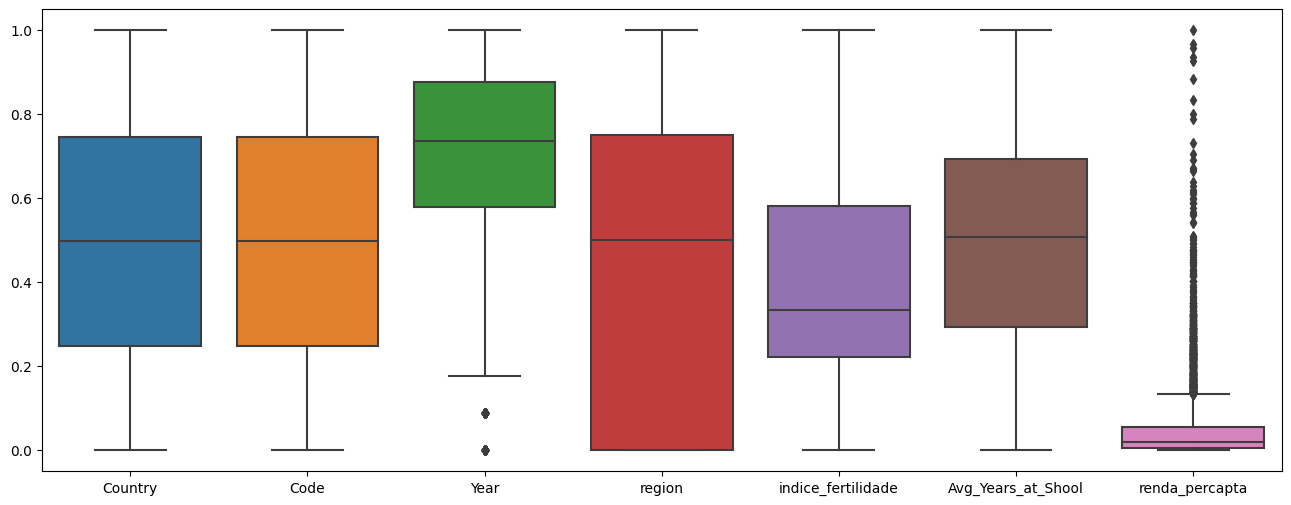

In [136]:
#plot para verificar em gráfico
#Presença de outliers na renda percapta
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = dataset_norm)

In [138]:
datasetfinal['renda_percapta'].describe()

count      4995.000000
mean      10015.183989
std       16825.478541
min          16.596459
25%         852.470991
50%        3293.229979
75%       10015.183989
max      178864.851914
Name: renda_percapta, dtype: float64

<Axes: >

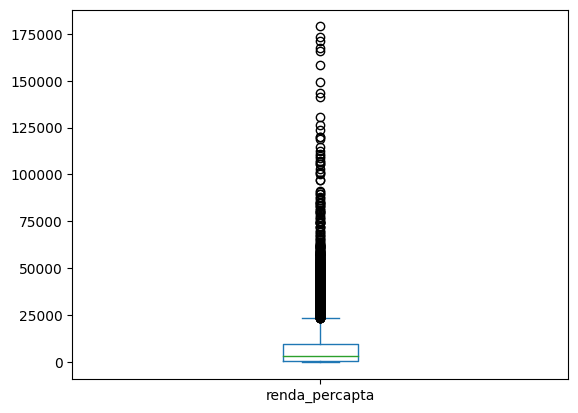

In [139]:
datasetfinal['renda_percapta'].plot.box()

In [140]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [141]:
datasetfinal.columns.values

array(['nova_chave', 'Country', 'Code', 'Year', 'region',
       'indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta',
       'Range'], dtype=object)

In [142]:
df_outlier = datasetfinal[['nova_chave', 'Country', 'Code', 'Year', 'region',
       'indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta', 'Range']].copy()

In [143]:
outlier_input = ['indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta']

In [144]:
model_IF = IsolationForest(contamination=0.1, max_features=1.0, random_state=42)
model_IF.fit(df_outlier[outlier_input])
df_outlier['outlier_score'] = model_IF.decision_function(df_outlier[outlier_input])
df_outlier['outlier'] = model_IF.predict(df_outlier[outlier_input])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [147]:
df_outlier.loc[:, ['indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta' , 'outlier_score', 'outlier']]

,indice_fertilidade,Avg_Years_at_Shool,renda_percapta,outlier_score,outlier
0,7.282,0.22,59.773234,-0.075397,-1
1,7.305,0.29,101.108325,-0.077025,-1
2,7.400,0.35,156.518771,-0.076353,-1
3,7.542,0.62,186.510838,-0.055935,-1
4,7.588,0.78,272.655510,-0.051549,-1
...,...,...,...,...,...
4990,4.064,8.00,1429.998461,0.099700,1
4991,3.962,8.20,1434.896277,0.090416,1
4992,3.849,8.20,1445.069702,0.089759,1
4993,3.771,8.20,1464.588957,0.092918,1


In [150]:
def outlier_plot (data, outlier_method_name, x_var, y_var,
                  xaxis_limits=[0,1], yaxis_limits=[0,1]):
  print(f'Outlier Method: {outlier_method_name}')

  method = f' {outlier_method_name}_anomaly'

  print(f"Number of anomalous values {len(data[data['outlier']==-1])}")
  print(f"Number of non anomalous values {len(data[data['outlier']==1])}")
  print(f'Total Number of Values: {len(data)}')

  g = sns.FacetGrid(data, col='outlier', height=4, hue='outlier', hue_order=[1,-1])
  g.map(sns.scatterplot, x_var, y_var)
  g.fig.suptitle(f'Outlier Method: {Outlier_method_name}', y=1.10, fontweight='bold')
  g.set(xlim=xaxis_limits, ylim=yaxis_limits)
  axes = g.axes.flatten()
  axes[0].set_title(f"Outliers\n{len(data[data['outlier']== -1])} points")
  axes[1].set_title(f"Inliers\n{len(data[data['outlier']== 1])} points")

  return g

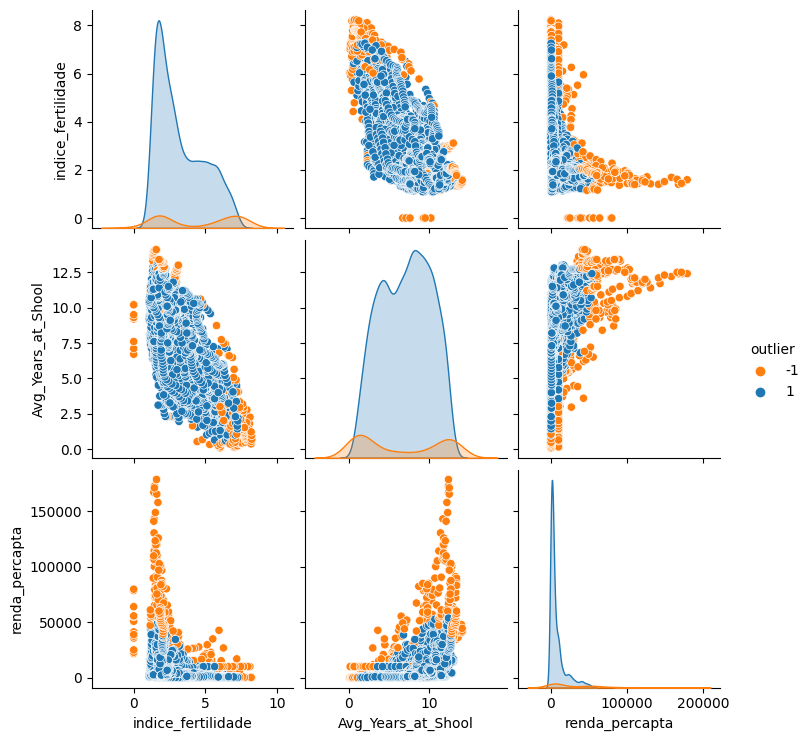

In [154]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_outlier, vars=outlier_input, hue='outlier', palette=palette)

# 5 Analytics

In [162]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
plt.style.use('fivethirtyeight')
#pd.set_option('display.max_columns', 100)
plt.rcParams['axes.prop_cycle'].by_key()['color']

In [191]:
# Calcular a média do índice de fertilidade por ano
df_media = datasetfinal.groupby('Range')['indice_fertilidade'].mean()

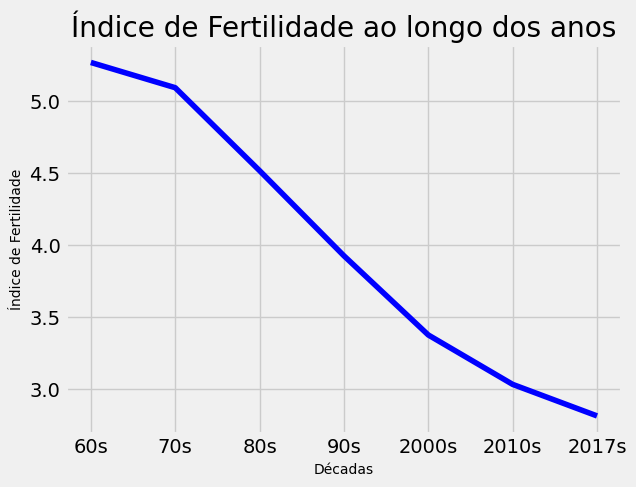

In [192]:
# Plotar o gráfico de linha
plt.plot(df_media.index, df_media.values, marker=' ', color='blue')
plt.xlabel('Décadas', fontsize=10)
plt.ylabel('Índice de Fertilidade', fontsize=10)
plt.title('Índice de Fertilidade ao longo dos anos')
plt.grid(True)
plt.show()

In [ ]:
# Calcular a média do índice de fertilidade para cada país
media_pais = datasetfinal.groupby('Country')['indice_fertilidade'].mean().reset_index()
media_pais

In [213]:
# Selecionar os 10 países com maior média de índice de fertilidade
top_mais_pais = media_pais.nlargest(10, 'indice_fertilidade')['Country'].tolist()
top_mais_pais

['Niger',
 'Somalia',
 'Chad',
 'Afghanistan',
 'Mali',
 'Burundi',
 'Uganda',
 'Angola',
 'Malawi',
 'Benin']

In [ ]:
# Filtrar os dados do índice de fertilidade apenas para os 10 países selecionados
df_top_mais_pais = datasetfinal[datasetfinal['Country'].isin(top_mais_pais)]
df_top_mais_pais

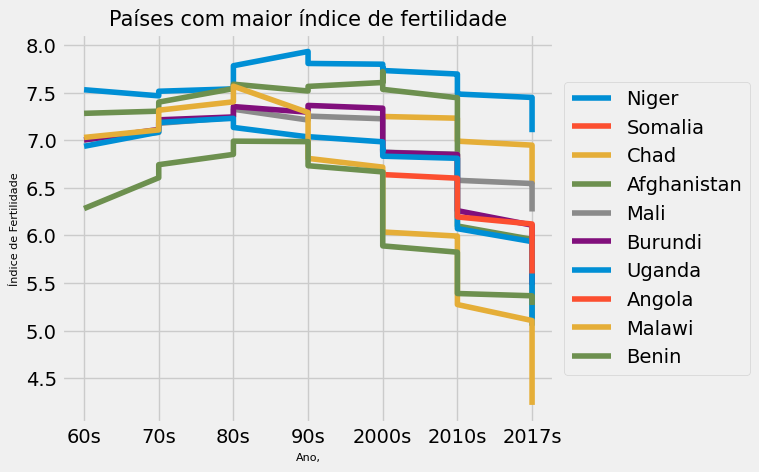

In [256]:
# Criar o gráfico de linhas
fig, ax = plt.subplots()

for pais in top_mais_pais:
    dados_pais_mais = df_top_mais_pais[df_top_mais_pais['Country'] == pais]
    ax.plot(dados_pais_mais['Range'], dados_pais_mais['indice_fertilidade'], label=pais)

plt.xlabel('Ano,', fontsize=8)
plt.ylabel('Índice de Fertilidade',  fontsize=8)
plt.title('Países com maior índice de fertilidade',  fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.85)

plt.show()

In [257]:
media_pais
top_menos_pais = media_pais.nsmallest(10, 'indice_fertilidade')['Country'].tolist()
top_menos_pais

['Andorra',
 'Liechtenstein',
 'Bosnia and Herzegovina',
 'Belarus',
 'Italy',
 'Germany',
 'Greece',
 'Japan',
 'Spain',
 'Ukraine']

In [ ]:
df_top_menos_pais = datasetfinal[datasetfinal['Country'].isin(top_menos_pais)]
df_top_menos_pais

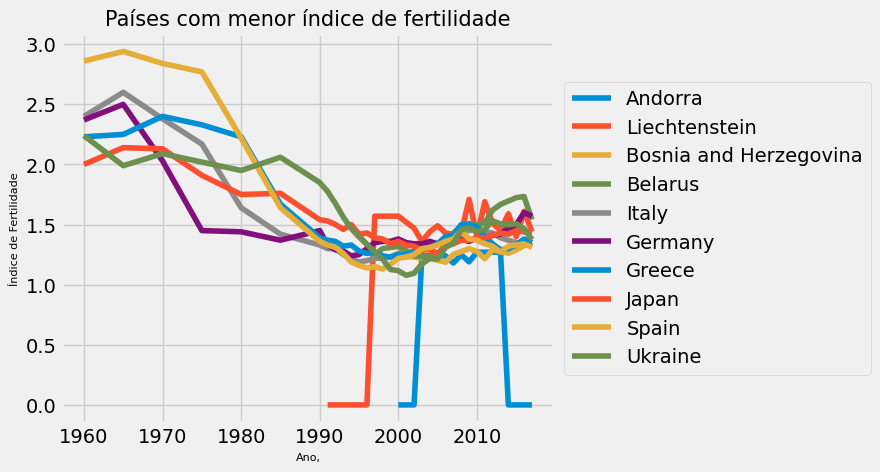

In [259]:
fig2, ax = plt.subplots()

for pais2 in top_menos_pais:
    dados_pais_menos = df_top_menos_pais[df_top_menos_pais['Country'] == pais2]
    ax.plot(dados_pais_menos['Year'], dados_pais_menos['indice_fertilidade'], label=pais2)

plt.xlabel('Ano,', fontsize=8)
plt.ylabel('Índice de Fertilidade',  fontsize=8)
plt.title('Países com menor índice de fertilidade',  fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.85)

plt.show()

In [ ]:
df_media_cont = datasetfinal.groupby(['Range', 'region'])['indice_fertilidade'].mean().reset_index()
df_media_cont

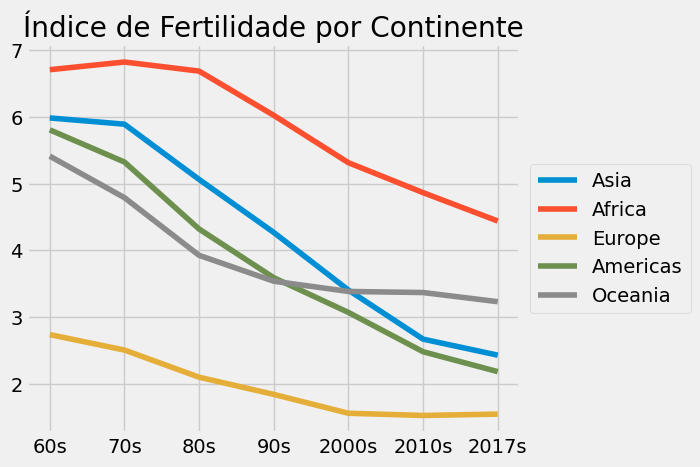

In [255]:
fig, ax = plt.subplots()

# Iterar sobre as regiões e plotar as linhas
continentes = datasetfinal['region'].unique()
for continente in continentes:
    dados_continente = df_media_cont[df_media_cont['region'] == continente]
    ax.plot(dados_continente['Range'], dados_continente['indice_fertilidade'], label=continente)

plt.title('Índice de Fertilidade por Continente')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.85)

plt.show()


<ipython-input-263-7f6c0e1ab562>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



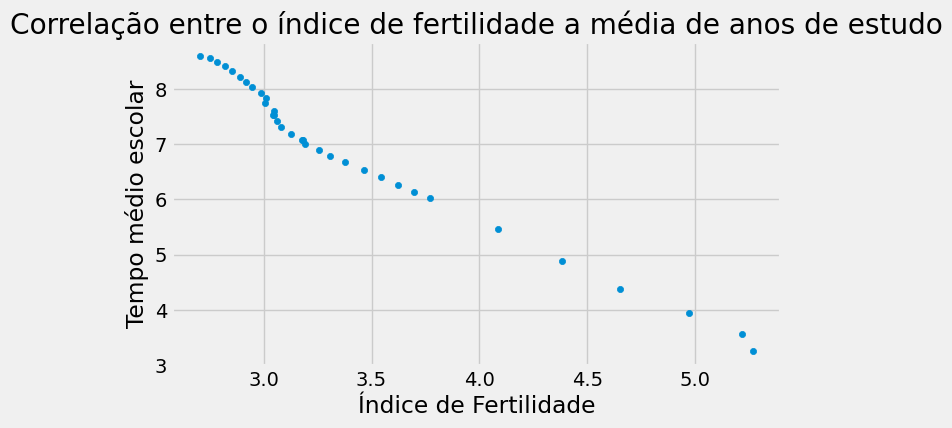

In [263]:
#Correlação entre Índice de Fertilidade e o Anos de escolaridade
ax = datasetfinal.groupby('Year')['indice_fertilidade', 'Avg_Years_at_Shool'].mean()\
.plot(kind='scatter', x='indice_fertilidade', y='Avg_Years_at_Shool',\
     title='Correlação entre o índice de fertilidade a média de anos de estudo',\
     figsize=(7,4))
ax.set_ylabel('Tempo médio escolar')
ax.set_xlabel('Índice de Fertilidade')
plt.show()

<ipython-input-264-019532f217ce>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



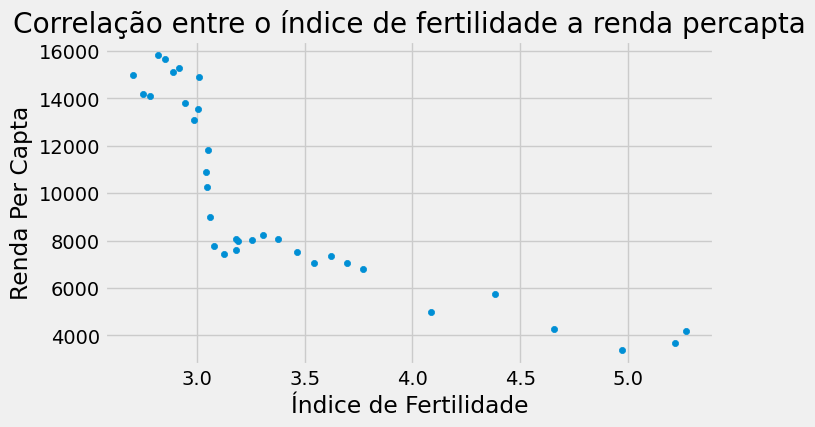

In [264]:
#Correlação entre Índice de Fertilidade e a Renda Per Capta
ax = datasetfinal.groupby('Year')['indice_fertilidade', 'renda_percapta'].mean()\
.plot(kind='scatter', x='indice_fertilidade', y='renda_percapta',\
     title='Correlação entre o índice de fertilidade a renda percapta',\
     figsize=(7,4))
ax.set_ylabel('Renda Per Capta')
ax.set_xlabel('Índice de Fertilidade')
plt.show()

# 6 Aplicando Teste de Hipótese


In [266]:
from scipy import stats

In [267]:
datasetfinal[['indice_fertilidade','Avg_Years_at_Shool']].describe()

,indice_fertilidade,Avg_Years_at_Shool
count,4995.000000,4995.000000
mean,3.360134,6.991389
std,1.812801,3.342408
min,0.000000,0.080000
25%,1.820250,4.200000
50%,2.744000,7.200000
75%,4.782500,9.800000
max,8.231000,14.100000


<Axes: >

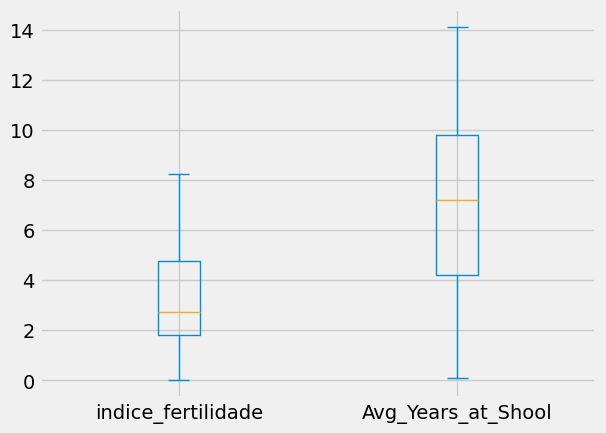

In [270]:
#sem outliers entre elas
datasetfinal[['indice_fertilidade','Avg_Years_at_Shool']].plot(kind='box')

In [285]:
# correlação de Pearson e realizar o teste de hipótese
correlation, p_value = stats.pearsonr(datasetfinal['indice_fertilidade'], datasetfinal['Avg_Years_at_Shool'])

alpha = 0.05  # Nível de significância

print(f"Coeficiente de correlação: {correlation}")
print(f"Valor de p: {p_value}")
if p_value < alpha:
    print("Rejeitamos a hipótese nula.")
    print("Há evidências estatísticas de que quanto maior é o tempo de estudos, menor é o nível de fertilidade.")
else:
    print("Não rejeitamos a hipótese nula.")
    print("Não há evidências estatísticas de diferença significativa entre o índice de fertilidade e o tempo de estudos.")

Coeficiente de correlação: -0.8087977793247811
Valor de p: 0.0
Rejeitamos a hipótese nula.
Há evidências estatísticas de que quanto maior é o tempo de estudos, menor é o nível de fertilidade.
